In [1]:
import pandas as pd

from fluxo.dados import Dados
from fluxo.carga_dados import CargaDados
from fluxo.limpeza_dados import LimpezaDados
from fluxo.preprocessamento import Preprocessamento
from fluxo.extracao_caracteristicas import ExtracaoCaracteristicas
from fluxo.treinamento import Treinamento
from fluxo.classificador import Classificador

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
pd.set_option('max_colwidth', 180)

## Carga de Dados

In [3]:
dados = Dados()

In [4]:
cg = CargaDados()
cg.executar(dados)

12:49:11 - Carregando dados de segmentos...
12:49:12 - 206488 registros carregados.


## Limpeza de Dados

In [5]:
lp = LimpezaDados(dados)
lp.executar(dados, 'ADE', reclassificar_nao_identificados=False)

12:49:12 - (Re)Carregando segmentos originais...
12:49:12 - Removendo segmentos nulos...
12:49:12 - 1900 segmentos nulos excluídos.
12:49:12 - Restaram 204588 segmentos não nulos.
12:49:12 - Removendo todos os segmentos do tipo Anexo...
12:49:12 - 5771 segmentos do tipo Anexo excluídos.
12:49:12 - Excluindo segmentos dos atos que não são ADE...
12:49:12 - 88078 segmentos de atos não ADE excluídos.
12:49:12 - Restaram 110739 segmentos de atos ADE.
12:49:12 - Removendo segmentos não representativos para o tipo ADE...
12:49:12 - 2595 segmentos não representativos excluídos.
12:49:12 - Restaram 108144 segmentos representativos.
12:49:12 - Removendo tags HTML...
12:49:12 - Removendo caracteres de escape HTML...
12:49:12 - Limpeza de dados concluída.


## Preprocessamento

In [6]:
pp = Preprocessamento()
pp.executar(dados)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/91872936504/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
12:49:12 - Convertendo caracteres para minúsculo...
12:49:12 - Removendo pontuação...
12:49:14 - Realizando tokenização...
12:49:14 - Removendo stopwords...
12:49:18 - Removendo tokens menores que 2 caracteres...
12:49:19 - Reconstruindo texto a partir dos tokens...
12:49:19 - Preprocessamento concluído.


## Extração de Características

In [7]:
ec = ExtracaoCaracteristicas(dados)
ec.executar(dados)

12:49:19 - Executando vetorização TF-IDF...
12:49:24 - Executando vetorização TF-IDF para Cross-Validation...
12:49:30 - Extração de características concluída.


## Treinamento e Teste

In [8]:
t = Treinamento()

In [9]:
# Linear SVC (SVM)
estimadorSVC = OneVsRestClassifier(LinearSVC(random_state=dados.random))
t.adicionar_modelo(Classificador('LinearSVC-1xR', estimadorSVC))

# Multinomial Naive Bayes 
estimadorNB = OneVsRestClassifier(MultinomialNB())
t.adicionar_modelo(Classificador('MultinomialNB-1xR', estimadorNB))

In [10]:
t.treinar_modelos(dados)

12:49:30 - Treinando modelo LinearSVC-1xR...
12:49:33 - Treinamento do modelo LinearSVC-1xR concluído.
12:49:33 - Treinando modelo MultinomialNB-1xR...
12:49:33 - Treinamento do modelo MultinomialNB-1xR concluído.


## Treinamento e Teste com Cross-Validation

In [11]:
t = Treinamento()

In [12]:
# Linear SVC (SVM)
estimadorSVC_CV = OneVsRestClassifier(LinearSVC(random_state=dados.random))
t.adicionar_modelo(Classificador('LinearSVC-1xR-CV', estimadorSVC_CV))

# Multinomial Naive Bayes 
estimadorNB_CV = OneVsRestClassifier(MultinomialNB())
t.adicionar_modelo(Classificador('MultinomialNB-1xR-CV', estimadorNB_CV))

In [13]:
t.treinar_modelos(dados, cv=5)

12:49:34 - Treinando modelo LinearSVC-1xR-CV com cross-validation...
12:49:48 - Treinamento do modelo LinearSVC-1xR-CV com cross-validation concluído.
12:49:48 - Treinando modelo MultinomialNB-1xR-CV com cross-validation...
12:49:51 - Treinamento do modelo MultinomialNB-1xR-CV com cross-validation concluído.


## Apresentação de Resultados

In [14]:
resultado = pd.DataFrame(dados.metricas)
resultado.transpose()

,acuracia,precisao,revocacao,f1
LinearSVC-1xR,0.9813,0.9764,0.9754,0.9759
MultinomialNB-1xR,0.9297,0.9282,0.9258,0.9259
LinearSVC-1xR-CV,0.9720,0.9630,0.9649,0.9636
MultinomialNB-1xR-CV,0.9157,0.9083,0.9129,0.9090


In [15]:
#print(resultado.transpose().to_latex())

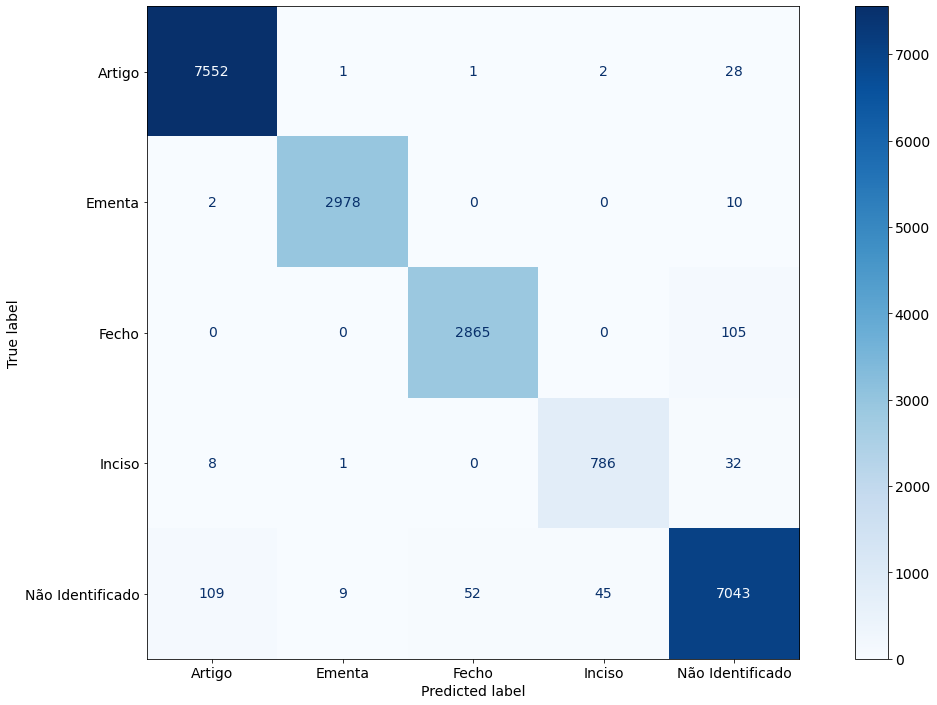

In [16]:
clf = Classificador('LinearSVC-1xR-CV', estimadorSVC_CV)
clf.treinar(dados)
clf.plotar_matriz_confusao(dados)